# Hacktiv8 Python for Data Science - Sesi 11

### - Regression

## Simple Linear Regression with Scikit Learn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [3]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])

In [4]:
print(x,y)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]] [ 5 20 14 32 22 38]


In [5]:
model = LinearRegression()

In [6]:
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
model = LinearRegression().fit(x, y)

#sama aja, cuma jadiin satu 2 rumus diatas

In [9]:
r_sq = model.score(x, y)

In [10]:
r_sq

0.715875613747954

In [13]:
model.coef_

#b0

array([0.54])

In [14]:
model.intercept_

#b1

5.633333333333329

In [15]:
## y head = 5.6 + 0.54(x)

In [17]:
y_pred = model.predict(x)

y_pred

array([ 8.33333333, 13.73333333, 19.13333333, 24.53333333, 29.93333333,
       35.33333333])

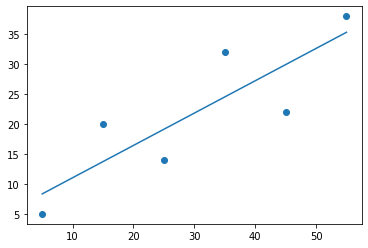

In [19]:
plt.scatter(x, y)
plt.plot(x, y_pred)

In [20]:
model.predict([[60]])

array([38.03333333])

In [21]:
# kalo pake itungan manual hasilnya 38

In [22]:
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

predicted response:
[ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]


In [25]:
x_new = np.arange(5).reshape((-1, 1))
print(x_new)

[[0]
 [1]
 [2]
 [3]
 [4]]


In [26]:
y_new = model.predict(x_new)
print(y_new)

[5.63333333 6.17333333 6.71333333 7.25333333 7.79333333]


### Multiple Linear Regression With Scikit Learn

In [28]:
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)

In [29]:
print(x)
print(y)

[[ 0  1]
 [ 5  1]
 [15  2]
 [25  5]
 [35 11]
 [45 15]
 [55 34]
 [60 35]]
[ 4  5 20 14 32 22 38 43]


In [31]:
model = LinearRegression().fit(x, y)

In [32]:
r_sq = model.score(x, y)

print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.8615939258756776
intercept: 5.52257927519819
slope: [0.44706965 0.25502548]


In [38]:
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

## response yg keluar = nilai garis lurusnya

predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


In [35]:
model.predict([[70, 40]])

array([47.01847395])

In [36]:
x_new = np.arange(10).reshape((-1, 2))
print(x_new)
y_new = model.predict(x_new)
print(y_new)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
[ 5.77760476  7.18179502  8.58598528  9.99017554 11.3943658 ]


### Polynomial Regression with Scikit Learn

In [40]:
from sklearn.preprocessing import PolynomialFeatures

In [41]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([15, 11, 2, 8, 25, 32])

In [45]:
x

array([[ 5],
       [15],
       [25],
       [35],
       [45],
       [55]])

In [46]:
y

array([15, 11,  2,  8, 25, 32])

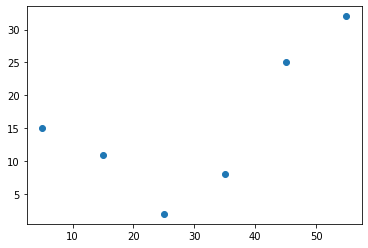

In [42]:
plt.scatter(x, y)

In [43]:
transformer = PolynomialFeatures(degree=2, include_bias=False)

In [44]:
transformer.fit(x)

PolynomialFeatures(degree=2, include_bias=False, interaction_only=False,
                   order='C')

In [47]:
x_ = transformer.transform(x)

In [48]:
x_

array([[   5.,   25.],
       [  15.,  225.],
       [  25.,  625.],
       [  35., 1225.],
       [  45., 2025.],
       [  55., 3025.]])

In [49]:
model = LinearRegression().fit(x_, y)

In [50]:
r_sq = model.score(x_, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('coefficients:', model.coef_)

coefficient of determination: 0.8908516262498564
intercept: 21.372321428571425
coefficients: [-1.32357143  0.02839286]


In [51]:
y_pred = model.predict(x_)

In [52]:
y_pred

array([15.46428571,  7.90714286,  6.02857143,  9.82857143, 19.30714286,
       34.46428571])

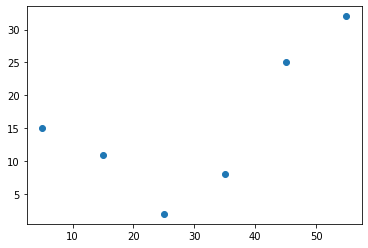

In [53]:
plt.scatter(x, y)

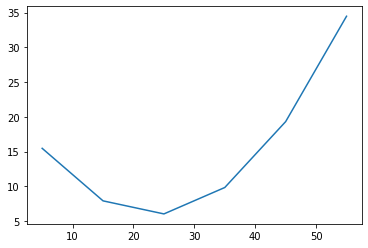

In [56]:
plt.plot(x, y_pred)

### Advanced Linear Regression with Statsmodels

In [57]:
import numpy as np
import statsmodels.api as sm

In [58]:
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)

In [59]:
print(x, y)

[[ 0  1]
 [ 5  1]
 [15  2]
 [25  5]
 [35 11]
 [45 15]
 [55 34]
 [60 35]] [ 4  5 20 14 32 22 38 43]


In [62]:
x = sm.add_constant(x)

## nambahin angka konstan 1 disebelah kiri secara default

In [61]:
x

array([[ 1.,  0.,  1.],
       [ 1.,  5.,  1.],
       [ 1., 15.,  2.],
       [ 1., 25.,  5.],
       [ 1., 35., 11.],
       [ 1., 45., 15.],
       [ 1., 55., 34.],
       [ 1., 60., 35.]])

In [63]:
model = sm.OLS(y, x)

In [64]:
result = model.fit()

In [68]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     15.56
Date:                Tue, 28 Jul 2020   Prob (F-statistic):            0.00713
Time:                        20:51:33   Log-Likelihood:                -24.316
No. Observations:                   8   AIC:                             54.63
Df Residuals:                       5   BIC:                             54.87
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5226      4.431      1.246      0.2

C:\Users\Dell XPS\anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


In [69]:
result.rsquared

0.8615939258756777

In [74]:
result.predict(x)
print(result.fittedvalues)

[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


In [77]:
result.predict([[1, 0, 1]])

array([5.77760476])

### Implementing Linear Regression on Real Dataset

### Using Statsmodels

In [80]:
import statsmodels.api as sm
from sklearn import datasets

data = datasets.load_boston()

In [81]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [84]:
import numpy as np
import pandas as pd

df = pd.DataFrame(data.data, columns=data.feature_names)

target = pd.DataFrame(data.target, columns=['MEDV'])

In [85]:
data.feature_names

## cuma bisa liat utk data yg dibuka dari sklearn

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [86]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [87]:
target.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [88]:
x = df['RM']
y = target['MEDV']

In [90]:
x

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64

In [91]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [92]:
model = sm.OLS(y, x).fit()
predictions = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              4615.
Date:                Tue, 28 Jul 2020   Prob (F-statistic):                   3.74e-256
Time:                        21:07:02   Log-Likelihood:                         -1747.1
No. Observations:                 506   AIC:                                      3496.
Df Residuals:                     505   BIC:                                      3500.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             3.6534      0.054     67.930      0.000       3.548       3.759
==============================================================================
Omnibus:                       83.295   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.507
Skew:                           0.955   Prob(JB):                     7.65e-34
Kurtosis:                       4.894   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

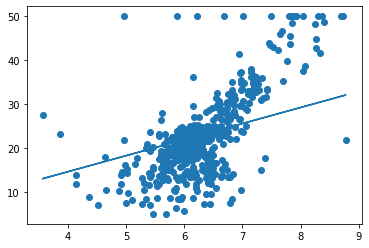

In [95]:
plt.scatter(x, y)
plt.plot(x, predictions)

### Using SKlearn

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn import datasets

data = datasets.load_boston()

In [98]:
df = pd.DataFrame(data.data, columns=data.feature_names)

target = pd.DataFrame(data.target, columns=['MEDV'])

In [99]:
x = df
y = target["MEDV"]

In [100]:
model = LinearRegression()
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [101]:
predictions = model.predict(x)

In [102]:
model.score(x, y)

0.7406426641094095

### Using SKLearn with Split

In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [104]:
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/CarPrice_Assignment.csv', 
                 usecols=['horsepower', 'price'])

In [107]:
df.head()

,horsepower,price
0,111,13495.0
1,111,16500.0
2,154,16500.0
3,102,13950.0
4,115,17450.0


In [106]:
df.shape

(205, 2)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   horsepower  205 non-null    int64  
 1   price       205 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.3 KB


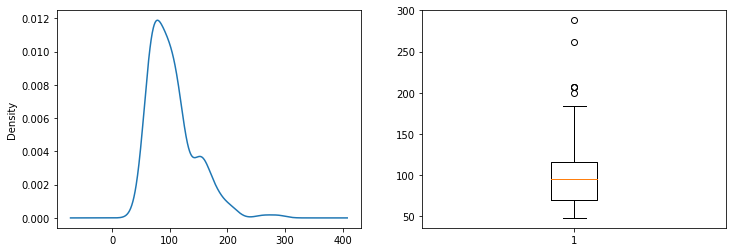

In [109]:
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['horsepower'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['horsepower'])
plt.show()


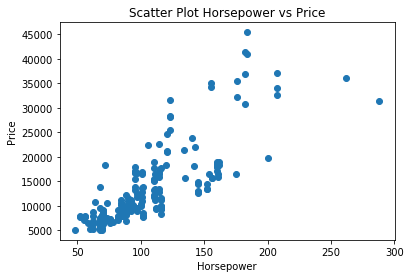

In [110]:
plt.scatter(df['horsepower'], df['price'])

plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Scatter Plot Horsepower vs Price')
plt.show()

In [113]:
x = df['horsepower'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [114]:
x

array([[111],
       [111],
       [154],
       [102],
       [115],
       [110],
       [110],
       [110],
       [140],
       [160],
       [101],
       [101],
       [121],
       [121],
       [121],
       [182],
       [182],
       [182],
       [ 48],
       [ 70],
       [ 70],
       [ 68],
       [ 68],
       [102],
       [ 68],
       [ 68],
       [ 68],
       [102],
       [ 88],
       [145],
       [ 58],
       [ 76],
       [ 60],
       [ 76],
       [ 76],
       [ 76],
       [ 76],
       [ 86],
       [ 86],
       [ 86],
       [ 86],
       [101],
       [100],
       [ 78],
       [ 70],
       [ 70],
       [ 90],
       [176],
       [176],
       [262],
       [ 68],
       [ 68],
       [ 68],
       [ 68],
       [ 68],
       [101],
       [101],
       [101],
       [135],
       [ 84],
       [ 84],
       [ 84],
       [ 84],
       [ 64],
       [ 84],
       [120],
       [ 72],
       [123],
       [123],
       [123],
       [123],
      

In [121]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# testsize = 20%

In [118]:
x_train, x_test, y_train, y_test

(array([[152],
        [111],
        [ 73],
        [123],
        [ 84],
        [ 94],
        [145],
        [ 62],
        [ 68],
        [ 88],
        [ 95],
        [ 56],
        [ 82],
        [114],
        [ 95],
        [ 90],
        [114],
        [182],
        [ 68],
        [ 78],
        [ 69],
        [160],
        [ 95],
        [ 70],
        [ 76],
        [121],
        [160],
        [156],
        [ 69],
        [111],
        [ 62],
        [ 72],
        [101],
        [135],
        [ 82],
        [ 97],
        [ 60],
        [ 68],
        [ 69],
        [100],
        [152],
        [145],
        [ 86],
        [ 64],
        [ 52],
        [ 68],
        [175],
        [ 94],
        [ 68],
        [116],
        [ 82],
        [ 70],
        [142],
        [ 70],
        [184],
        [ 70],
        [145],
        [ 69],
        [ 88],
        [200],
        [123],
        [ 70],
        [ 82],
        [145],
        [ 90],
        [ 85],
        [2

In [119]:
x_train.shape

(164, 1)

In [120]:
x_test.shape

(41, 1)

In [123]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [124]:
model.intercept_, model.coef_


(array([-4152.33050506]), array([[165.53379826]]))

In [125]:
model.score(x_test, y_test)

0.4689196059660671

In [126]:
model.predict([[100]])

array([[12401.04932127]])

In [127]:
model.predict([[200]])

array([[28954.42914761]])

In [128]:
y_pred = model.predict(x_test)

Text(0.5, 1.0, 'Plot Horsepower vs Price')

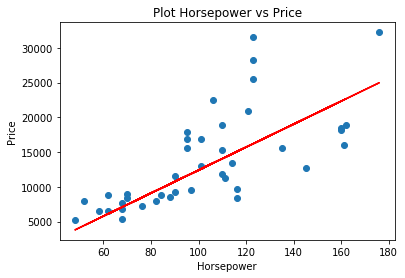

In [133]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, c = 'r')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Plot Horsepower vs Price')